# Laboratorio 1
dataset https://www.kaggle.com/datasets/rashadrmammadov/football-teams-price-prediction

Conectando a drive



In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


Importar librerias necesarias






In [33]:
# utilizado para manejos de directorios y rutas
import os
import pandas as pd
# Computacion vectorial y cientifica para python
import numpy as np

# Librerias para graficación (trazado de gráficos)
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D  # Necesario para graficar superficies 3D

# llama a matplotlib a embeber graficas dentro de los cuadernillos
%matplotlib inline

from sklearn.preprocessing import StandardScaler

Importando dataset de drive

In [36]:
import pandas as pd

# Cargar datos del archivo CSV, considerando las comas en valores numéricos
data = pd.read_csv('/content/gdrive/MyDrive/IA/datasets/Football_teams_price_data.csv', thousands=',')

# Convertir el DataFrame a un array de NumPy
data_array = data.values

# Extraer las primeras 15 columnas como características (X)
X = data_array[:, :15]

# Extraer la última columna como objetivo (y)
y = data_array[:, -1]

# Calcular el número de ejemplos de entrenamiento
m = y.size

print(X)


[[24.367182020405163 28 16 ... 713.96887188926 15.847841443814742
  14.36125301009329]
 [34.16214320896857 89 12 ... 236.6446936949068 26.73169659771237
  23.96707575264632]
 [30.443897010793886 43 3 ... 410.5020578099962 21.36517064355909
  64.30983124598899]
 ...
 [30.732916439297604 88 34 ... 565.2815918759849 44.21372835481823
  36.76473967284281]
 [26.85718550156197 78 22 ... 434.7479149298367 33.94294588402847
  61.84940214265706]
 [32.64901407711477 61 28 ... 11.969673095686638 15.094618372238871
  29.949943942876843]]


Imprecion de datos

In [37]:
print(y)

[4375181628 859750388 2168913729 ... 4884297718 3060046918 3633930225]


Se necesita normalizar los datos.

In [38]:
#scala cada característica individualmente restando el valor mínimo y luego dividiendo por el rango (es decir, la diferencia entre el máximo y el mínimo)
from sklearn.preprocessing import MinMaxScaler

# Convertir datos a tipo float
X = X.astype(float)

# Crear el objeto MinMaxScaler
scaler = MinMaxScaler()

# Ajustar el scaler a los datos y transformarlos
X_normalized = scaler.fit_transform(X)

print(X_normalized)

[[0.37454709 0.10126582 0.43243243 ... 0.71110088 0.31005456 0.1436139 ]
 [0.95074051 0.87341772 0.32432432 ... 0.22893676 0.52993332 0.23967518]
 [0.73201285 0.29113924 0.08108108 ... 0.40455699 0.42151722 0.64311553]
 ...
 [0.74901456 0.86075949 0.91891892 ... 0.56090595 0.88311034 0.36765588]
 [0.52102277 0.73417722 0.59459459 ... 0.42904869 0.67561705 0.61851046]
 [0.86172995 0.51898734 0.75675676 ... 0.00198359 0.29483773 0.29950576]]


In [39]:
#normalizar las características de una matriz de datos X
def featureNormalize(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

# Convertir datos a tipo float
X = X.astype(float)

# Aplicar la normalización de características
X_norm, mu, sigma = featureNormalize(X)

print("Datos originales:")
print(X)
print('Media calculada:', mu)
print('Desviación estándar calculada:', sigma)
print("Datos normalizados:")
print(X_norm)

Datos originales:
[[ 24.36718202  28.          16.         ... 713.96887189  15.84784144
   14.36125301]
 [ 34.16214321  89.          12.         ... 236.64469369  26.7316966
   23.96707575]
 [ 30.44389701  43.           3.         ... 410.50205781  21.36517064
   64.30983125]
 ...
 [ 30.73291644  88.          34.         ... 565.28159188  44.21372835
   36.76473967]
 [ 26.8571855   78.          22.         ... 434.74791493  33.94294588
   61.84940214]
 [ 32.64901408  61.          28.         ...  11.9696731   15.09461837
   29.94994394]]
Media calculada: [2.64806779e+01 5.93431600e+01 1.84254600e+01 1.86044600e+01
 1.84781000e+01 5.95386800e+01 2.74506391e+02 5.48545679e+04
 4.74253111e+04 9.98455193e+01 1.00406919e+02 2.45846400e+01
 5.05104996e+02 2.52492369e+01 5.00002783e+01]
Desviación estándar calculada: [4.90285955e+00 2.30955009e+01 1.09553313e+01 1.09801516e+01
 1.09968014e+01 2.30495524e+01 1.30149193e+02 2.59860898e+04
 2.45783862e+04 5.76662211e+01 5.76092759e+01 1.4426216

desenso por gradiente

In [40]:
# Añadir el término de intersección a X
# (Columna de unos para X0)
X = np.concatenate([np.ones((m, 1)), X_norm], axis=1)

In [41]:
print(X)

[[ 1.         -0.43107411 -1.35711107 ...  0.72908866 -0.65752867
  -1.23628999]
 [ 1.          1.56673167  1.28409599 ... -0.93712405  0.10368245
  -0.90307149]
 [ 1.          0.8083485  -0.70763393 ... -0.33023388 -0.27164956
   0.49638723]
 ...
 [ 1.          0.86729765  1.24079751 ...  0.21006061  1.32636659
  -0.45913051]
 [ 1.          0.07679348  0.80781275 ... -0.245598    0.60803345
   0.41103686]
 [ 1.          1.25810992  0.07173865 ... -1.72140524 -0.7102087
  -0.69553046]]


In [42]:
def computeCostMulti(X, y, theta):
    # Inicializa algunos valores útiles
    m = y.shape[0]  # número de ejemplos de entrenamiento

    J = 0

    h = np.dot(X, theta)

    J = (1 / (2 * m)) * np.sum(np.square(h - y))

    return J

In [43]:
def gradientDescentMulti(X, y, theta, alpha, num_iters):
    # Inicializa algunos valores
    m = y.shape[0]  # número de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será actualizada por el descenso por el gradiente
    theta = theta.copy()

    J_history = []

    for i in range(num_iters):
        theta = theta - (alpha / m) * np.dot(X.T, np.dot(X, theta) - y)
        J_history.append(computeCostMulti(X, y, theta))

    return theta, J_history

In [44]:
print(X.shape)

(50000, 16)


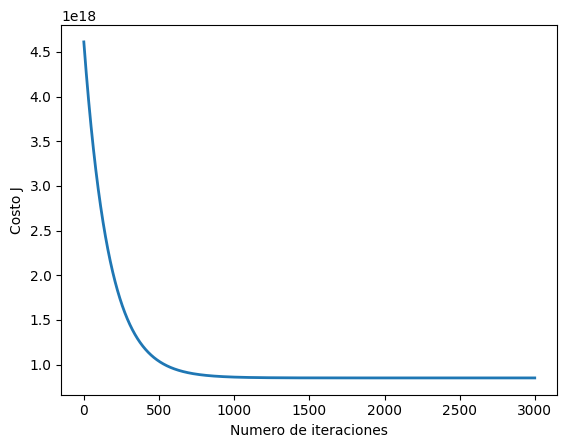

Theta calculado por el descenso por el gradiente: [ 2.75039106e+09  3.49048569e+06 -2.16922644e+06  3.07747241e+06
 -1.39622862e+07  1.79373898e+06  2.04193717e+06 -3.27153721e+06
  6.32193952e+06 -4.32104877e+06  2.82614202e+06  1.38606394e+06
 -3.07476093e+06  3.96784765e+06  8.02852742e+05  4.65686736e+06]
El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): $2729298518.78


In [48]:
import matplotlib.pyplot as plt

# Elegir algún valor para alpha (probar varias alternativas)
alpha = 0.003
num_iters = 3000

# Inicializa theta y ejecuta el descenso por el gradiente
theta = np.zeros(X.shape[1])
y = y.astype(float)
theta, J_history = gradientDescentMulti(X, y, theta, alpha, num_iters)

# Grafica la convergencia del costo
plt.plot(np.arange(len(J_history)), J_history, lw=2)
plt.xlabel('Numero de iteraciones')
plt.ylabel('Costo J')
plt.show()

# Muestra los resultados del descenso por el gradiente
print('Theta calculado por el descenso por el gradiente:', theta)


X_array = np.array([24.367182020405163,28,16,36,20,51,337.552001410687,55766,5229.742719570072,177.59212633151475,79.97274956206351,49,713.96887188926,15.847841443814742,14.36125301009329])
X_array_normalized = (X_array - mu) / sigma
X_array_normalized = np.insert(X_array_normalized, 0, 1)  # Agregar el término de intersección
price = np.dot(X_array_normalized, theta)

print('El precio predecido para un conjunto de características X_array (usando el descenso por el gradiente): ${:.2f}'.format(price))


In [50]:
X_array = np.array([34.16214320896857,89,12,35,31,84,264.85040216224945,15307,46172.73888195951,125.4419523276792,7.679349174887529,38,236.64469369490678,26.731696597712375,23.967075752646316])

# Normalizar todas las características de X_array
X_array = (X_array - mu) / sigma

print("X_array normalizado:", X_array)

X_array normalizado: [ 1.56673167  1.28409599 -0.58651444  1.49319797  1.13868566  1.06124924
 -0.07419169 -1.52187452 -0.05096235  0.44387221 -1.60959444  0.92992922
 -0.93712405  0.10368245 -0.90307149]


In [51]:
# Agregar una columna de unos al principio de X_array para representar el término de intersección
X_array_with_intercept = np.insert(X_array, 0, 1)

# Calcular el precio predicho usando el producto punto
price = np.dot(X_array_with_intercept, theta)

# Imprimir el precio predicho
print('El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): ${:.0f}'.format(price))


El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): $2713795553


In [52]:
X_array = np.array([28.21895519963455,39,30,12,20,90,85.02742136646857,96695,80231.73280453196,60.472617219761624,17.98654095335841,24,386.68290628656524,16.543692589019322,53.488943763250695])

# Normalizar todas las características de X_array
X_array = (X_array - mu) / sigma

print("X_array normalizado:", X_array)

X_array normalizado: [ 0.35454357 -0.88082783  1.05652122 -0.60149079  0.13839479  1.32155799
 -1.45585973  1.61010881  1.33476712 -0.68277236 -1.43067895 -0.04052622
 -0.41338025 -0.60886121  0.12101908]


In [53]:
# Agregar una columna de unos al principio de X_array para representar el término de intersección
X_array_with_intercept = np.insert(X_array, 0, 1)

# Calcular el precio predicho usando el producto punto
price = np.dot(X_array_with_intercept, theta)

# Imprimir el precio predicho
print('El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): ${:.0f}'.format(price))

El precio predicho para un conjunto de características X_array (usando el descenso por el gradiente): $2771956506
